In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

<Axes: title={'center': '한글폰트'}>

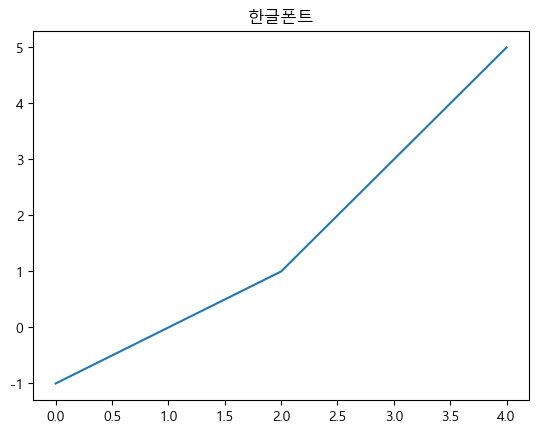

In [4]:
pd.Series([-1, 0, 1, 3, 5]).plot(title='한글폰트')

# 데이터 불러오기

In [6]:
df = pd.read_csv('C:/Users/User/Desktop/opendata/data/상가업소정보_201912_01.csv',  sep='|')
df.shape

(573680, 39)

In [7]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

<Axes: >

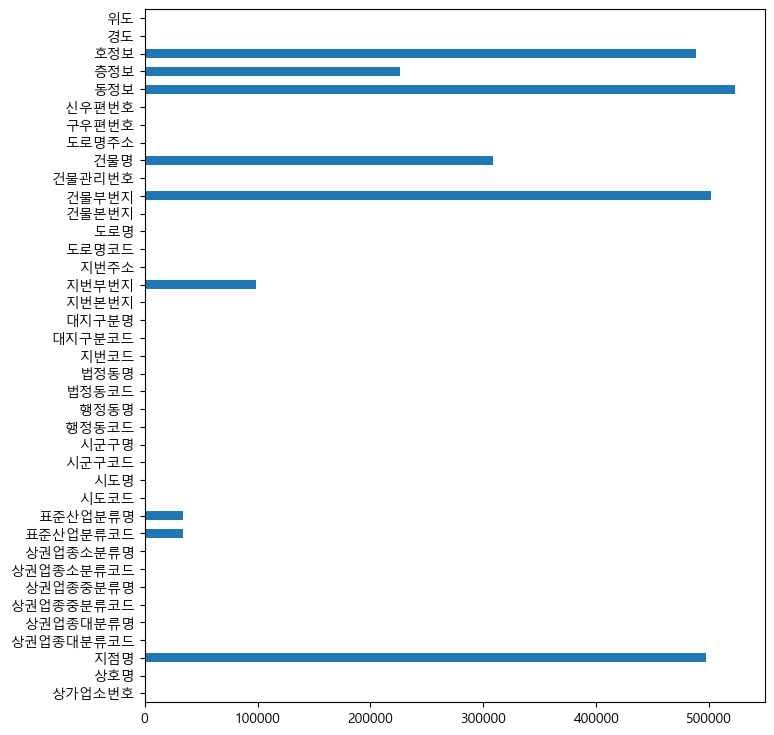

In [9]:
df.isnull().sum().plot.barh(figsize=(8,9))

In [10]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.shape

(573680, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 서울만 따로 보기

In [12]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(407376, 11)

## 상호명에서 브랜드 추출

In [13]:
df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [14]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'),'상호명_소문자'].shape

(543,)

In [15]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명_소문자'].shape

(506,)

In [16]:
df_cafe = df_seoul[
    df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()
df_cafe.shape

(1049, 12)

In [17]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '스타벅스'
df_cafe.loc[~df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'
df_cafe[['상호명_소문자', '브랜드명']].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [18]:
df_cafe[['상호명','브랜드명']].tail()

,상호명,브랜드명
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


# 시각화

<Axes: >

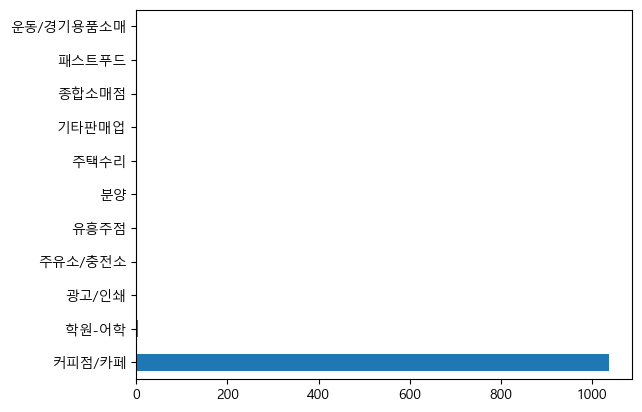

In [19]:
df_cafe['상권업종중분류명'].value_counts().plot.barh()

In [20]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe['상권업종중분류명'] == '커피점/카페'].copy()
df_cafe.shape

(1049, 13)


(1036, 13)

In [21]:
df_cafe['브랜드명'].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<Axes: xlabel='브랜드명', ylabel='count'>

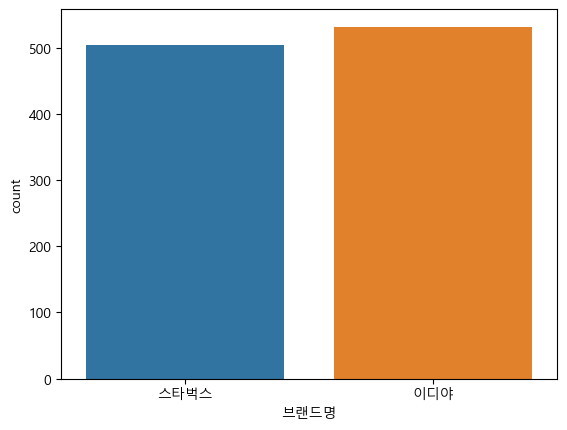

In [22]:
sns.countplot(data=df_cafe, x='브랜드명')

<Axes: xlabel='시군구명', ylabel='count'>

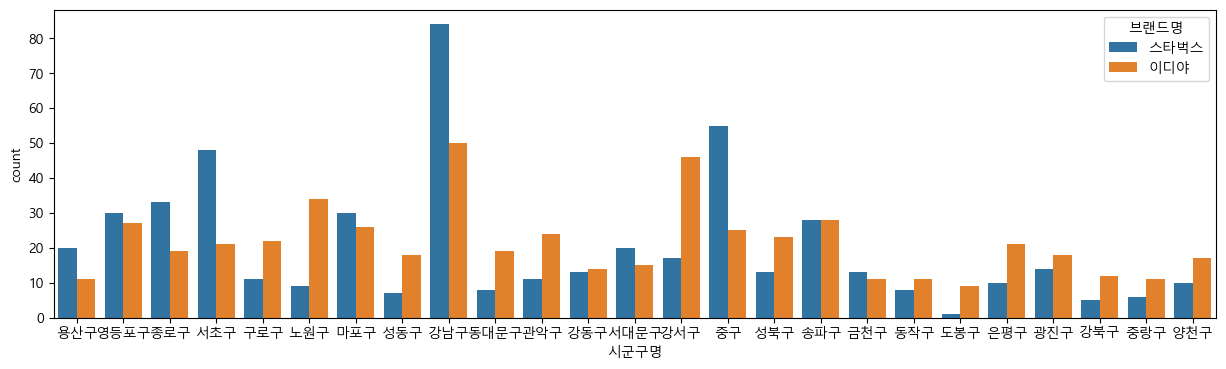

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명')

<Axes: xlabel='경도', ylabel='위도'>

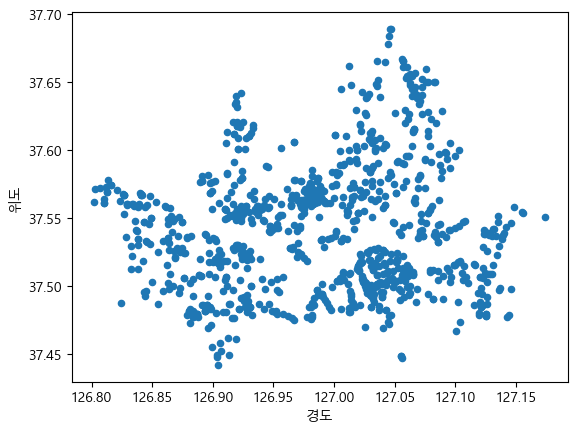

In [25]:
df_cafe[['위도','경도']].plot.scatter(x='경도',y ='위도')

<Axes: xlabel='경도', ylabel='위도'>

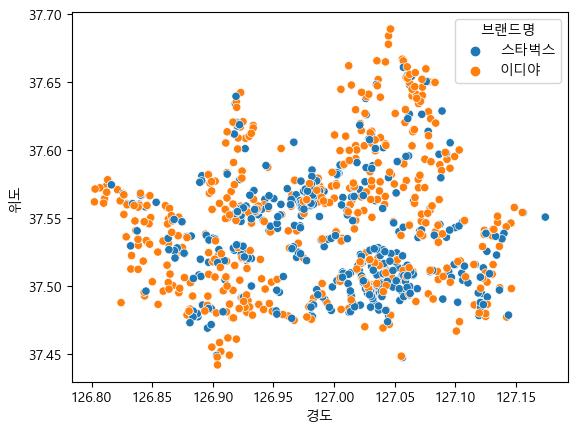

In [26]:
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

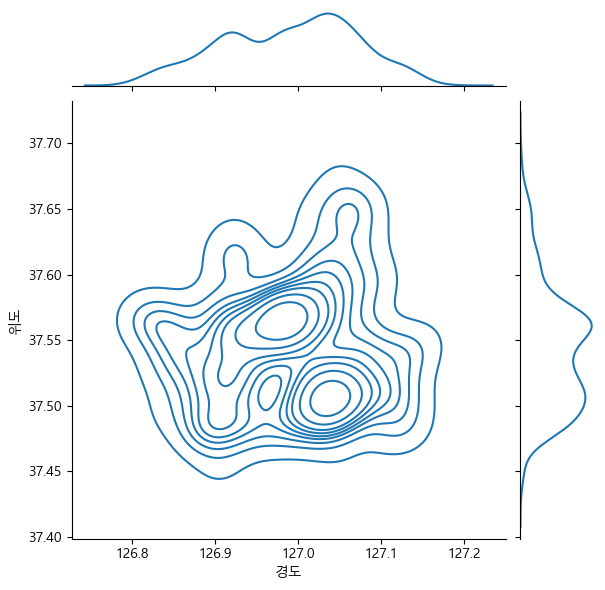

In [28]:
sns.jointplot(data=df_cafe, x='경도', y='위도', kind='kde')

# groupby

In [29]:
# 구 별 매장수
df_cafe_vs = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [30]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [31]:
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


# pivot_table

In [32]:
pivot = pd.pivot_table(data=df_cafe,
                      index=['시군구명', '브랜드명'],
                      values='상호명', aggfunc='count')
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [33]:
pivot.loc['강남구']

,상호명
브랜드명,
스타벅스,84
이디야,50


# 시각화

<Axes: xlabel='구', ylabel='매장수'>

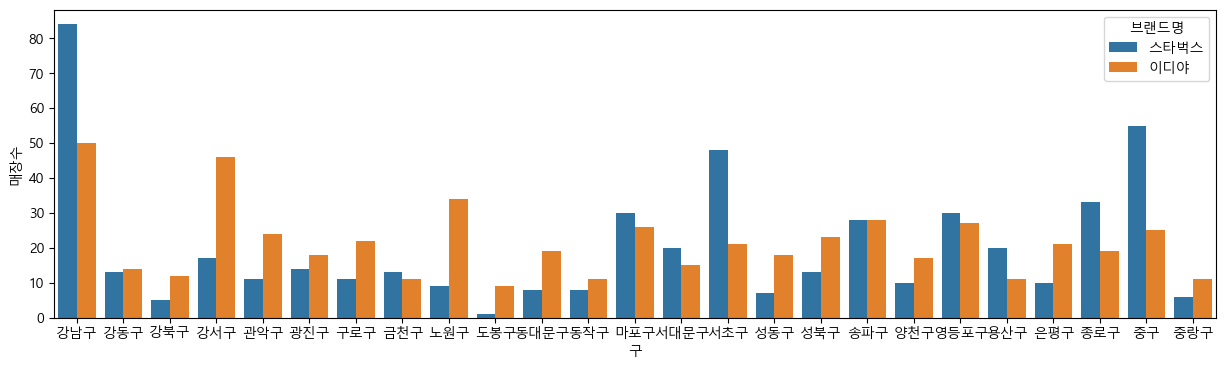

In [34]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs, x='구', y='매장수', hue='브랜드명')

<Axes: xlabel='구', ylabel='매장수'>

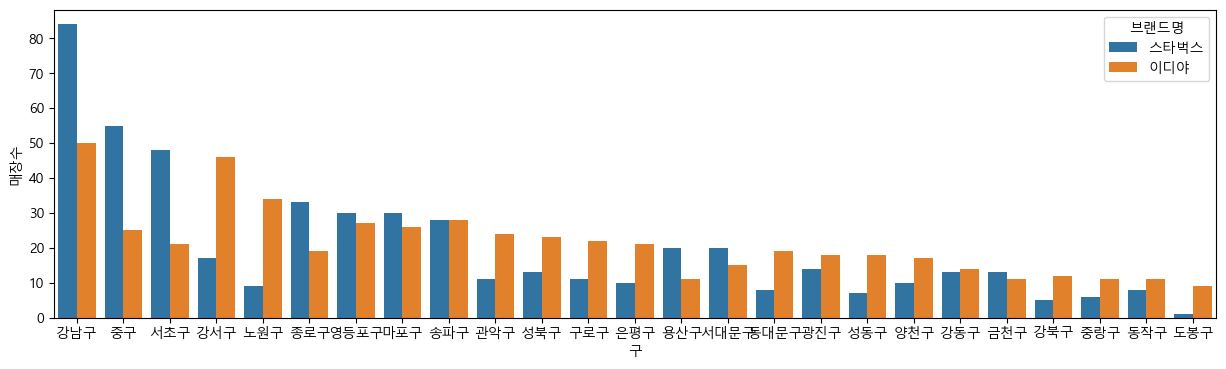

In [35]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs.sort_values('매장수', ascending=False), x='구', y='매장수', hue='브랜드명')

# unstack

<Axes: xlabel='시군구명,브랜드명'>

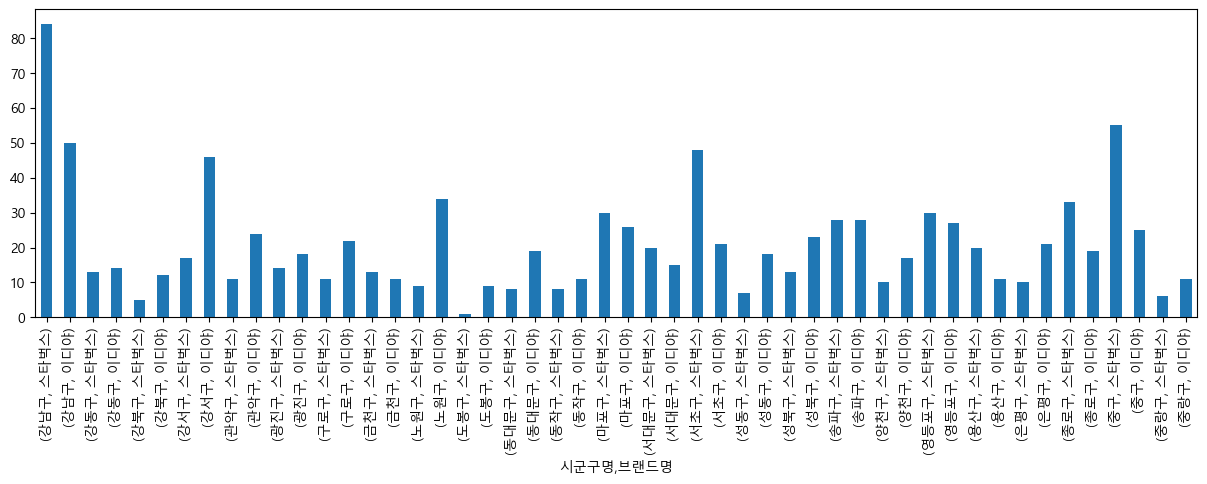

In [36]:
# groupby를 통해 '시군구명','브랜드명''으로 그룹화하고 '상호명' 갯수 구하기
group = df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
group.plot.bar(figsize=(15,4))

<Axes: xlabel='시군구명'>

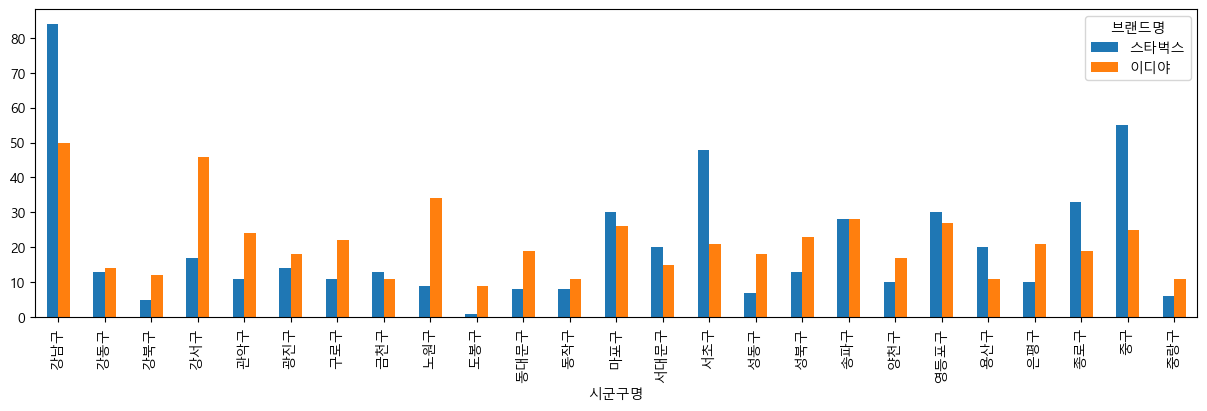

In [37]:
group.unstack().plot.bar(figsize=(15,4))

In [38]:
pivot = pd.pivot_table(data=df_cafe, index='시군구명',
                      columns='브랜드명',
                      values='상호명',
                      aggfunc='count')

<Axes: xlabel='시군구명'>

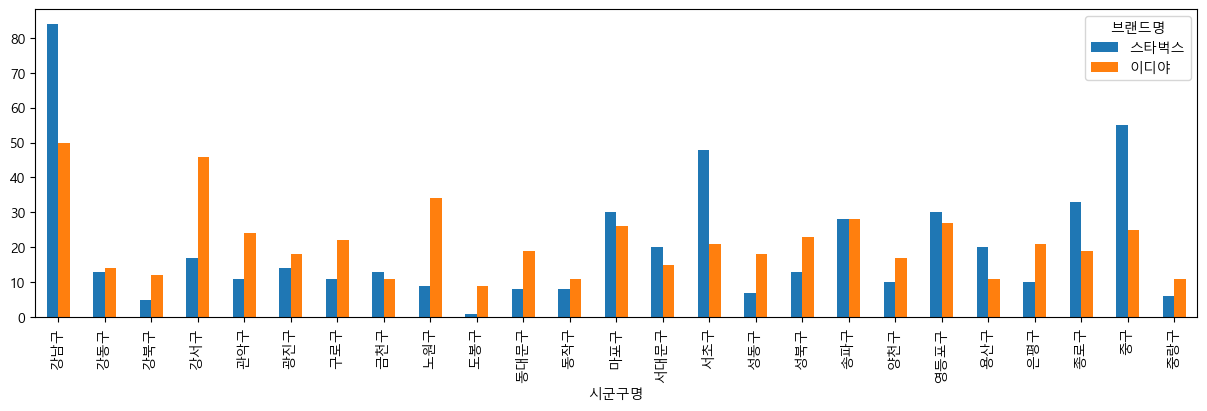

In [39]:
pivot.plot.bar(figsize=(15,4))

In [40]:
gu_name_list = df_cafe['시군구명'].unique().tolist()
gu_name_list.sort()
gu_name_list[:5]

['강남구', '강동구', '강북구', '강서구', '관악구']

<Axes: xlabel='시군구명', ylabel='count'>

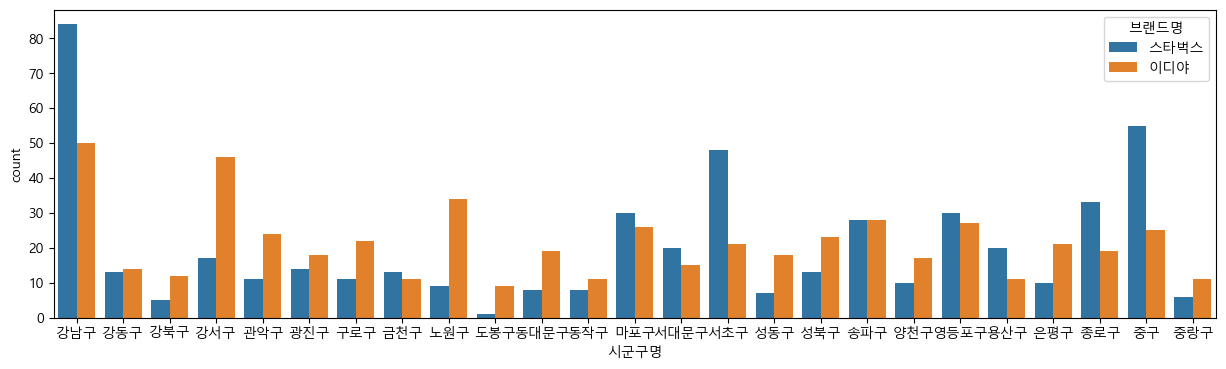

In [41]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x='시군구명', hue='브랜드명', order=gu_name_list)